#### Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

- **Answer:**
  Anomaly detection is the process of identifying data points, events, or patterns that deviate significantly from the normal behavior of a dataset. These anomalies may indicate critical incidents such as fraud, network intrusions, or system failures.

  **Types of Anomalies:**
  1. **Point Anomalies:**  
     - A single data point is very different from the rest of the data.  
     - *Example:* In a dataset of monthly salaries where most employees earn between ₹30,000–₹70,000, one entry of ₹5,00,000 is a point anomaly.

  2. **Contextual Anomalies (Conditional Anomalies):**  
     - A data point is anomalous in a specific context but may be normal otherwise.  
     - *Example:* A temperature of 30°C is normal in summer but anomalous in winter.

  3. **Collective Anomalies:**  
     - A collection of related data points together is anomalous, even if individual points are not.  
     - *Example:* Sudden repeated login attempts from different IP addresses in a short time window may indicate a cyber-attack.

---

#### Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

- **Answer:**

  **1. Isolation Forest (iForest):**
  - **Approach:** Based on randomly partitioning data. Anomalies are easier to isolate as they lie far from the rest of the data.  
  - **Use Case:** Works well with high-dimensional datasets, large-scale anomaly detection like fraud detection.

  **2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**
  - **Approach:** Clusters data based on density. Points in low-density areas that don’t belong to any cluster are anomalies.  
  - **Use Case:** Detecting anomalies in spatial data, geospatial analysis, or datasets with irregular cluster shapes.

  **3. Local Outlier Factor (LOF):**
  - **Approach:** Compares the local density of a point with that of its neighbors. Points with significantly lower density are outliers.  
  - **Use Case:** Good for datasets where local density varies, such as network traffic anomaly detection.

---

#### Question 3: What are the key components of a Time Series? Explain each with one example.

- **Answer:**

  The key components of a time series are:

  1. **Trend:** Long-term increase or decrease in the data.  
     - *Example:* Rising housing prices over 10 years.

  2. **Seasonality:** Repeating patterns at fixed intervals.  
     - *Example:* Higher ice cream sales every summer.

  3. **Cyclic Component:** Long-term oscillations not fixed in time (unlike seasonality).  
     - *Example:* Economic recessions and booms.

  4. **Irregular/Random Component:** Unpredictable variations caused by random factors.  
     - *Example:* Sudden drop in stock prices due to unexpected news.

---

#### Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

- **Answer:**

  **Stationary Time Series:**  
  A time series is said to be stationary if its statistical properties (mean, variance, autocorrelation) do not change over time.

  **Testing Stationarity:**
  1. **Visual Inspection:** Plot the series and check for trend/seasonality.  
  2. **Summary Statistics:** Split into parts and compare mean/variance.  
  3. **Statistical Tests:** Augmented Dickey-Fuller (ADF) test or KPSS test.

  **Transforming Non-Stationary to Stationary:**
  - **Differencing:** Subtract current value from the previous value.  
  - **Log Transformation:** Stabilizes variance in series with exponential growth.  
  - **Detrending:** Remove the trend component explicitly.  
  - **Seasonal Adjustment:** Remove seasonality patterns.

---

#### Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

- **Answer:**

  1. **AR (AutoRegressive):**  
     - Uses past values (lags) of the variable to predict the future.  
     - *Example:* Stock price prediction using its previous prices.

  2. **MA (Moving Average):**  
     - Uses past forecast errors to predict the future.  
     - *Example:* Predicting demand based on past error terms.

  3. **ARIMA (AutoRegressive Integrated Moving Average):**  
     - Combines AR + MA + differencing (Integrated) to make series stationary.  
     - *Example:* Forecasting sales data with trend and noise.

  4. **SARIMA (Seasonal ARIMA):**  
     - Extends ARIMA by modeling seasonal patterns.  
     - *Example:* Predicting monthly airline passenger data with yearly seasonality.

  5. **SARIMAX (Seasonal ARIMA with Exogenous Variables):**  
     - SARIMA + external regressors (factors influencing the series).  
     - *Example:* Predicting energy consumption considering temperature as an external factor.

---


/tmp/ipython-input-1651957440.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start="1949-01", periods=len(data), freq="M")


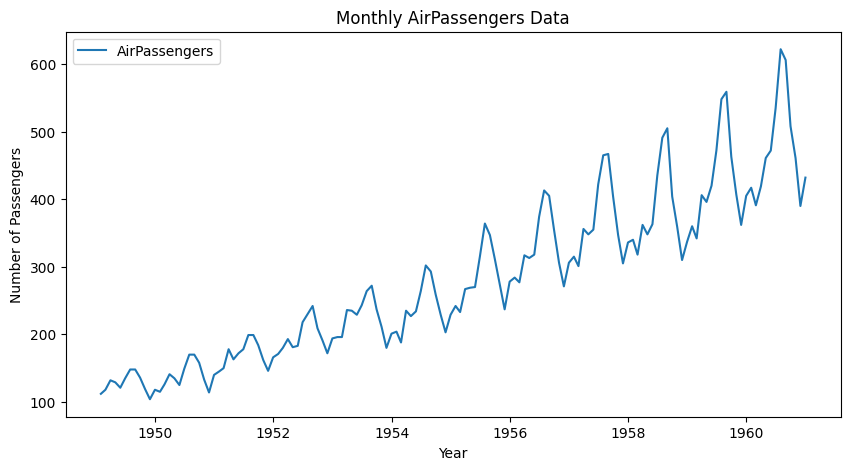

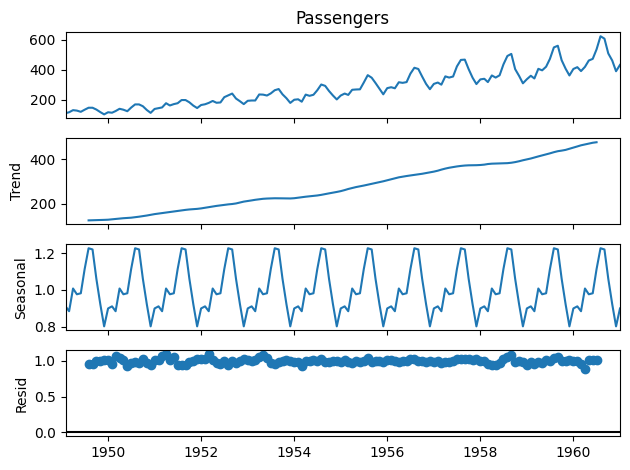

In [2]:
"""Dataset:
● NYC Taxi Fare Data
● AirPassengers Dataset
Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components"""

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

# Load AirPassengers dataset from statsmodels
data = get_rdataset("AirPassengers").data

# Convert 'time' column to datetime index
data['Month'] = pd.date_range(start="1949-01", periods=len(data), freq="M")
data.set_index('Month', inplace=True)

# Rename column for clarity
data.rename(columns={"value": "Passengers"}, inplace=True)

# Plot original series
plt.figure(figsize=(10,5))
plt.plot(data['Passengers'], label="AirPassengers")
plt.title("Monthly AirPassengers Data")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# Decompose the series
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative')

# Plot decomposition
decomposition.plot()
plt.show()


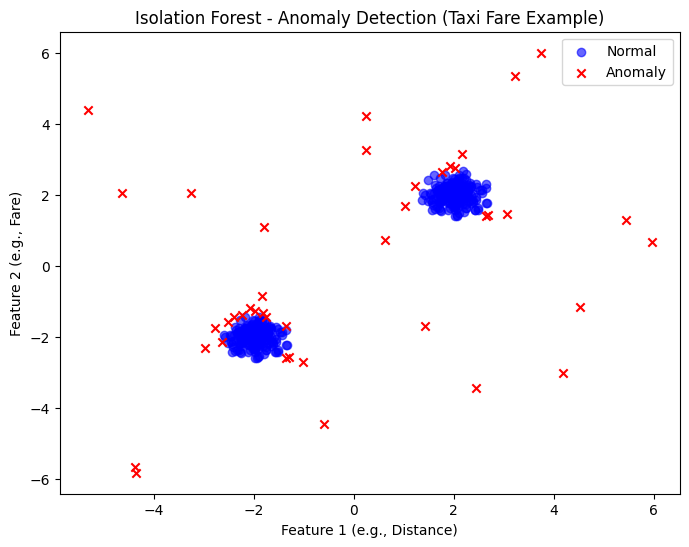

In [3]:
"""Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.
"""

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# (Demo: Create synthetic Taxi Fare-like data for faster run)
# In real Colab use, you would load a sample of NYC Taxi Fare dataset instead.
np.random.seed(42)
n_samples = 200
# Normal data (e.g., pickup and dropoff distance vs fare)
X = 0.3 * np.random.randn(n_samples, 2)
X_train = np.r_[X + 2, X - 2]

# Add some outliers (anomalies)
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))

# Combine dataset
X_full = np.r_[X_train, X_outliers]

# Apply Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(X_full)
y_pred = clf.predict(X_full)

# Convert labels: 1 = normal, -1 = anomaly
normal = X_full[y_pred == 1]
anomaly = X_full[y_pred == -1]

# Plot anomalies vs normal points
plt.figure(figsize=(8,6))
plt.scatter(normal[:, 0], normal[:, 1], c='blue', label="Normal", alpha=0.6)
plt.scatter(anomaly[:, 0], anomaly[:, 1], c='red', label="Anomaly", marker='x')
plt.title("Isolation Forest - Anomaly Detection (Taxi Fare Example)")
plt.xlabel("Feature 1 (e.g., Distance)")
plt.ylabel("Feature 2 (e.g., Fare)")
plt.legend()
plt.show()


/tmp/ipython-input-1902232325.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start="1949-01", periods=len(data), freq="M")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


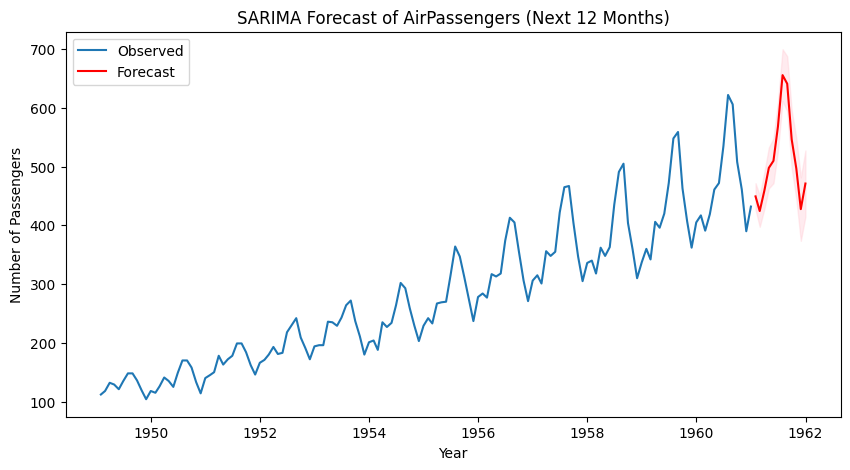

In [4]:
"""Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.
"""

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.datasets import get_rdataset

# Load AirPassengers dataset
data = get_rdataset("AirPassengers").data
data['Month'] = pd.date_range(start="1949-01", periods=len(data), freq="M")
data.set_index('Month', inplace=True)
data.rename(columns={"value": "Passengers"}, inplace=True)

# Fit SARIMA model (p,d,q)(P,D,Q,s)
# Seasonal period 's' = 12 (monthly data with yearly seasonality)
model = SARIMAX(data['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot results
plt.figure(figsize=(10,5))
plt.plot(data['Passengers'], label="Observed")
plt.plot(forecast_mean, label="Forecast", color="red")
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title("SARIMA Forecast of AirPassengers (Next 12 Months)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()


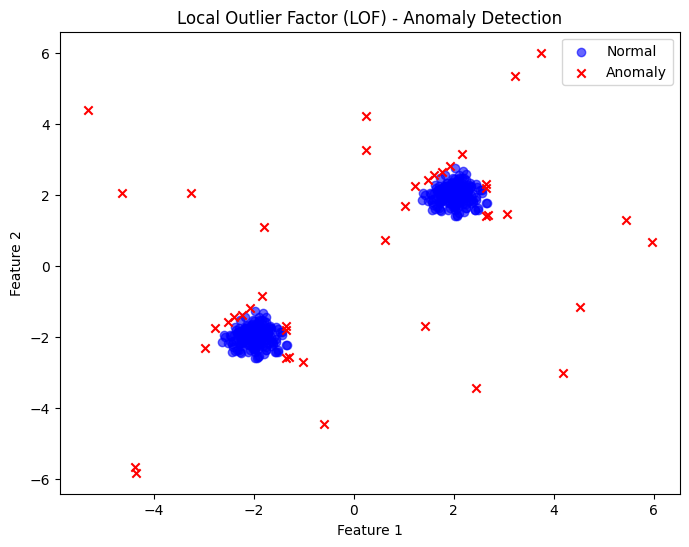

In [5]:
"""Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.
"""
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate synthetic dataset
np.random.seed(42)
X = 0.3 * np.random.randn(200, 2)  # Normal cluster
X = np.r_[X + 2, X - 2]            # Shifted clusters

# Add some anomalies
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
X_full = np.r_[X, X_outliers]

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X_full)

# Separate normal and anomaly points
normal = X_full[y_pred == 1]
anomaly = X_full[y_pred == -1]

# Plot results
plt.figure(figsize=(8,6))
plt.scatter(normal[:, 0], normal[:, 1], c='blue', label="Normal", alpha=0.6)
plt.scatter(anomaly[:, 0], anomaly[:, 1], c='red', label="Anomaly", marker='x')
plt.title("Local Outlier Factor (LOF) - Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


### Question 10: You are working as a data scientist for a power grid monitoring company.Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.

- **Answer:**

#### 1. Anomaly Detection in Streaming Data
- **Algorithms:**  
  - **Isolation Forest:** Suitable for high-dimensional real-time data, isolates abnormal spikes/drops efficiently.  
  - **Local Outlier Factor (LOF):** Detects local density anomalies (e.g., one region consuming abnormally compared to neighbors).  
  - **DBSCAN:** Can detect unusual clusters of anomalies (e.g., multiple regions showing unexpected spikes at the same time).  
- **Choice:** Use **Isolation Forest** for streaming anomaly detection because it scales well and works in real-time.

---

#### 2. Time Series Forecasting for Short-Term Energy Demand
- **Options:**
  - **ARIMA:** Good for univariate non-seasonal forecasting.  
  - **SARIMA:** Handles strong seasonal patterns (e.g., daily/weekly cycles).  
  - **SARIMAX:** Incorporates exogenous variables like weather (temperature, humidity) or special events.  
- **Choice:** Use **SARIMAX**, since weather significantly influences energy demand and should be included as an external regressor.

---

#### 3. Validation and Monitoring
- **Validation Strategy:**
  - Use **rolling/expanding window cross-validation** instead of random train-test split (time series nature).  
  - Evaluate using **MAPE (Mean Absolute Percentage Error)**, **RMSE (Root Mean Square Error)** for forecasting.  
  - Track **precision/recall** for anomaly detection.  

- **Monitoring in Real-Time:**
  - Implement **model drift detection** (data distribution changes).  
  - Use a dashboard to visualize forecast vs. actual in real-time.  
  - Retrain models periodically as new data arrives.

---

#### 4. Business Impact
- **Benefits of Forecasting:**
  - Accurate short-term demand prediction helps **optimize power generation** and reduce operational costs.  
  - Prevents **overloading or under-utilization** of resources.  

- **Benefits of Anomaly Detection:**
  - Detects abnormal spikes/drops (equipment failure, power theft, sudden weather impact).  
  - Enables **faster response** by operators to prevent blackouts or financial losses.  

- **Overall:**  
  This solution improves **grid stability, cost efficiency, and reliability**, while supporting data-driven decisions in power management.

---
